In [8]:
import pandas as pd
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
with open('train_results/learn_curve_xp_type_tau_uniform.pkl', 'rb') as f:
    res_uniform_tau = pickle.load(f)

with open('train_results/learn_curve_xp_type_tau_constant.pkl', 'rb') as f:
    res_constant_tau = pickle.load(f)

with open('train_results/learn_curve_xp_type_tau_gauss.pkl', 'rb') as f:
    res_gauss_tau = pickle.load(f)

In [3]:
with open('train_results_2/learn_curve_xp_type_tau_uniform.pkl', 'rb') as f:
    res_uniform_tau.extend(pickle.load(f))

with open('train_results_2/learn_curve_xp_type_tau_constant.pkl', 'rb') as f:
    res_constant_tau.extend(pickle.load(f))

with open('train_results_2/learn_curve_xp_type_tau_gauss.pkl', 'rb') as f:
    res_gauss_tau.extend(pickle.load(f))

In [48]:
for res in res_uniform_tau:
    res['total_loss_valid'] =  res['loss_supervised_valid'] + res['loss_reg_valid']
for res in res_constant_tau:
    res['total_loss_valid'] =  res['loss_supervised_valid'] + res['loss_reg_valid']
for res in res_gauss_tau:
    res['total_loss_valid'] =  res['loss_supervised_valid'] + res['loss_reg_valid']

#### Figure 1: Loss function per epoch and training and validation sets

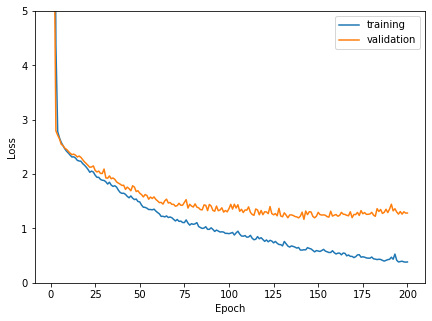

In [45]:
# uniform tau xp
idx = 16
loss_train = np.array(res_gauss_tau[idx]['loss_supervised_train']) + np.array(res_gauss_tau[idx]['loss_reg_train'])
loss_valid = np.array(res_gauss_tau[idx]['loss_supervised_valid']) + np.array(res_gauss_tau[idx]['loss_reg_valid'])
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, len(loss_train)+1), loss_train, label='training')
plt.plot(np.arange(1, len(loss_valid)+1), loss_valid, label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 5])
plt.savefig('figs/learn_curve.png', bbox_inches='tight')
plt.show()

#### Figure 2: Accuracy of model with time constants generated from a random uniform distribution with increasing bounds

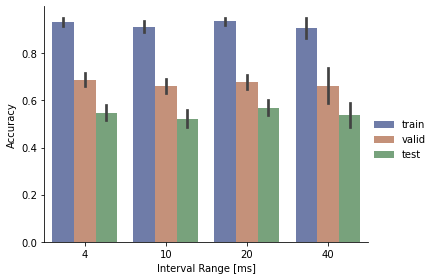

In [10]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_uniform_tau]
df['train'] = [x['acc_train'][-1] for x in res_uniform_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_uniform_tau]
df['lower'] = [x['xp_params']['uniform_lower_bounds'][x['i']] for x in res_uniform_tau]
df['upper'] = [x['xp_params']['uniform_upper_bounds'][x['i']] for x in res_uniform_tau]
df['width'] = (round((df['upper'] - df['lower']) * 1e3)).astype(int)
df = df.melt(id_vars=['width'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="width", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6, height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("Interval Range [ms]", "Accuracy")
g.savefig('figs/uniform_tau.png')
plt.show()

In [21]:
sample1 = df[np.all((df['variable'] == 'test', df['width'] == 4), axis=0)]['acc']
sample2 = df[np.all((df['variable'] == 'test', df['width'] == 10), axis=0)]['acc']
sample3 = df[np.all((df['variable'] == 'test', df['width'] == 20), axis=0)]['acc']
sample4 = df[np.all((df['variable'] == 'test', df['width'] == 40), axis=0)]['acc']
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=2.387347140577696, pvalue=0.08503906334979569)

#### Figure 3: Accuracy of model with time constants generated from a normal distribution with increasing variance

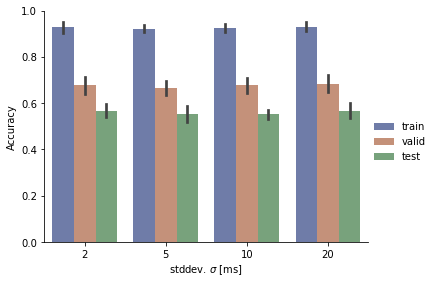

In [26]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_gauss_tau]
df['train'] = [x['acc_train'][-1] for x in res_gauss_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_gauss_tau]
df['stddev'] = [x['xp_params']['gauss_std'][x['i']] for x in res_gauss_tau]
df['stddev'] = round(df['stddev'] * 1e3).astype(int)
df = df.melt(id_vars=['stddev'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="stddev", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6, height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("stddev. $\sigma$ [ms]", "Accuracy")
g.savefig('figs/gauss_tau.png')
plt.show()

In [27]:
sample1 = df[np.all((df['variable'] == 'test', df['stddev'] == 2), axis=0)]['acc']
sample2 = df[np.all((df['variable'] == 'test', df['stddev'] == 5), axis=0)]['acc']
sample3 = df[np.all((df['variable'] == 'test', df['stddev'] == 10), axis=0)]['acc']
sample4 = df[np.all((df['variable'] == 'test', df['stddev'] == 20), axis=0)]['acc']
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=0.6837826953599577, pvalue=0.5677917428247974)

#### Figure 4: Accuracy of model with increasing homogenous time constants

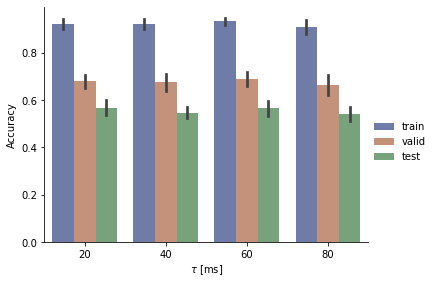

In [28]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_constant_tau]
df['train'] = [x['acc_train'][-1] for x in res_constant_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_constant_tau]
df['tau'] = [x['xp_params']['constant_tau'][x['i']] for x in res_constant_tau]
df['tau'] = round(df['tau'] * 1e3).astype(int)
df = df.melt(id_vars=['tau'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="tau", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6,height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("$\\tau$ [ms]", "Accuracy")
g.savefig('figs/constant_tau.png')
plt.show()

In [80]:
sample1 = df[np.all((df['variable'] == 'test', df['tau'] == 20), axis=0)]['acc']
sample2 = df[np.all((df['variable'] == 'test', df['tau'] == 40), axis=0)]['acc']
sample3 = df[np.all((df['variable'] == 'test', df['tau'] == 60), axis=0)]['acc']
sample4 = df[np.all((df['variable'] == 'test', df['tau'] == 80), axis=0)]['acc']
stats.f_oneway(sample1, sample2, sample3, sample4)

KeyError: 'variable'

#### Figure 5: Convergence of model with time constants generated from a random uniform distribution with increasing bounds

In [61]:
def convergence_epochs(loss_arr):
    num_stopping_rounds = 20
    lowest_loss = loss_arr[0]
    no_decrease_counter = 0
    for e, x in enumerate(loss_arr):
        if x < lowest_loss:
            lowest_loss = x 
            no_decrease_counter = 0
            continue 
        
        no_decrease_counter += 1
        if no_decrease_counter >= num_stopping_rounds:
            return e+1
    return len(loss_arr)

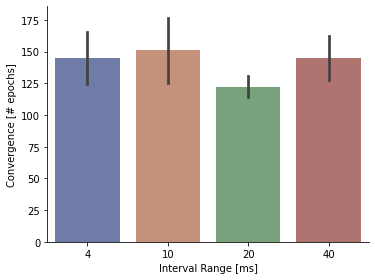

In [72]:
df = pd.DataFrame()
df['total_loss_valid'] = [x['total_loss_valid'] for x in res_gauss_tau]
df['lower'] = [x['xp_params']['uniform_lower_bounds'][x['i']] for x in res_uniform_tau]
df['upper'] = [x['xp_params']['uniform_upper_bounds'][x['i']] for x in res_uniform_tau]
df['width'] = (round((df['upper'] - df['lower']) * 1e3)).astype(int)
df['convergence_epochs']  = df['total_loss_valid'].apply(convergence_epochs)

g = sns.catplot(
    data=df, kind="bar",
    x="width", y="convergence_epochs",
    ci="sd", palette="dark", alpha=.6,height=4, aspect=4/3
)
g.set_axis_labels("Interval Range [ms]", "Convergence [# epochs]")
g.savefig('figs/convergence_gauss_tau.png')
plt.show()

In [73]:
sample1 = df[ df['width'] == 4]['convergence_epochs']
sample2 = df[df['width'] == 10]['convergence_epochs']
sample3 = df[df['width'] == 20]['convergence_epochs']
sample4 = df[df['width'] == 40]['convergence_epochs']
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=3.941492635293153, pvalue=0.015728991494778025)

#### Figure 6: Convergence of model with time constants generated from a normal distribution with increasing variance

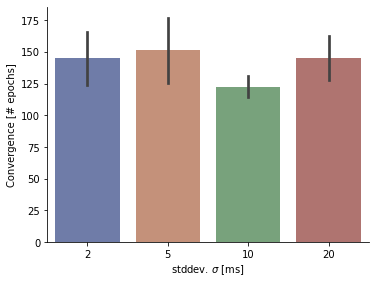

In [75]:
df = pd.DataFrame()
df['total_loss_valid'] = [x['total_loss_valid'] for x in res_gauss_tau]
df['stddev'] = [x['xp_params']['gauss_std'][x['i']] for x in res_gauss_tau]
df['stddev'] = round(df['stddev'] * 1e3).astype(int)
df['convergence_epochs']  = df['total_loss_valid'].apply(convergence_epochs)

g = sns.catplot(
    data=df, kind="bar",
    x="stddev", y="convergence_epochs",
    ci="sd", palette="dark", alpha=.6,height=4, aspect=4/3
)
g.set_axis_labels("stddev. $\sigma$ [ms]", "Convergence [# epochs]")
g.savefig('figs/convergence_gauss_tau.png')
plt.show()

In [76]:
sample1 = df[ df['stddev'] == 2]['convergence_epochs']
sample2 = df[df['stddev'] == 5]['convergence_epochs']
sample3 = df[df['stddev'] == 10]['convergence_epochs']
sample4 = df[df['stddev'] == 20]['convergence_epochs']
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=3.941492635293153, pvalue=0.015728991494778025)

#### Figure 7: Convergence of model with increasing homogenous time constants

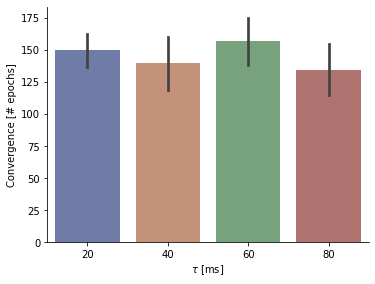

In [78]:
df = pd.DataFrame()
df['total_loss_valid'] = [x['total_loss_valid'] for x in res_constant_tau]
df['tau'] = [x['xp_params']['constant_tau'][x['i']] for x in res_constant_tau]
df['tau'] = round(df['tau'] * 1e3).astype(int)
df['convergence_epochs']  = df['total_loss_valid'].apply(convergence_epochs)

g = sns.catplot(
    data=df, kind="bar",
    x="tau", y="convergence_epochs",
    ci="sd", palette="dark", alpha=.6,height=4, aspect=4/3
)
g.set_axis_labels("$\\tau$ [ms]", "Convergence [# epochs]")
g.savefig('figs/convergence_constant_tau.png')
plt.show()

In [79]:
sample1 = df[ df['tau'] == 20]['convergence_epochs']
sample2 = df[df['tau'] == 40]['convergence_epochs']
sample3 = df[df['tau'] == 60]['convergence_epochs']
sample4 = df[df['tau'] == 80]['convergence_epochs']
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=2.7533680169025607, pvalue=0.056623986627335005)

### Checks

#### Random uniform distribution of time constants

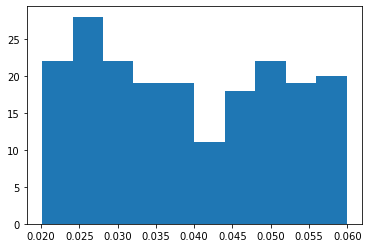

In [7]:
plt.figure()
plt.hist(res_uniform_tau[3]['gen_distribution_tau'][0])
plt.show()

#### Random gaussian distribution of time constants

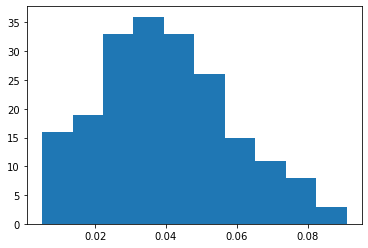

In [8]:
plt.figure()
plt.hist(res_gauss_tau[3]['gen_distribution_tau'][0])
plt.show()

#### Constant distribution of time constants

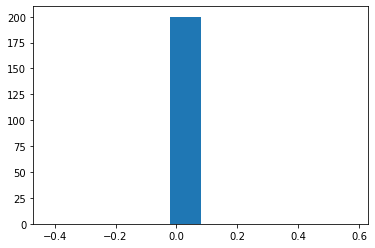

In [9]:
plt.figure()
plt.hist(res_constant_tau[3]['gen_distribution_tau'][0])
plt.show()